Data visualization script. 

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numphy as np


company_name_list = ['TSLA','AMZN','GOOG','AAPL','META','NFLX','AMD','INTC','NVDA']

In [9]:
sentiment_df = pd.read_csv('sentiment_data.csv')
# Fill empty date with previous date from same company
sentiment_df = pd.concat([  g.ffill().assign(d=lambda d: d.date.shift())
                            for _, g in sentiment_df.groupby('company')])
sentiment_df.head()

,Unnamed: 0,company,date,headline,h_sentiment,t_sentiment,0_labda,0.25_labda,0.5_labda,0.75_labda,1_labda,d
300,300,AAPL,Nov-30-22,Elon Musk and Apple's Tim Cook Make Peace,0.5423,-0.052670,0.5423,0.393558,0.244815,0.096073,-0.052670,None
301,301,AAPL,Nov-30-22,Elon Musk appears to make nice with Apple afte...,0.4215,-0.232080,0.4215,0.258105,0.094710,-0.068685,-0.232080,Nov-30-22
302,302,AAPL,Nov-30-22,"Elon Musk meets Apple CEO Tim Cook, says Twitt...",0.2057,-0.169014,0.2057,0.112021,0.018343,-0.075336,-0.169014,Nov-30-22
303,303,AAPL,Nov-30-22,Elon Musk Says Apple and Twitter Have Resolved...,0.1779,-0.083817,0.1779,0.112471,0.047041,-0.018388,-0.083817,Nov-30-22
304,304,AAPL,Nov-30-22,Elon Musk says Apple never considered removing...,0.0000,-0.223920,0.0000,-0.055980,-0.111960,-0.167940,-0.223920,Nov-30-22


C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\1858159406.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


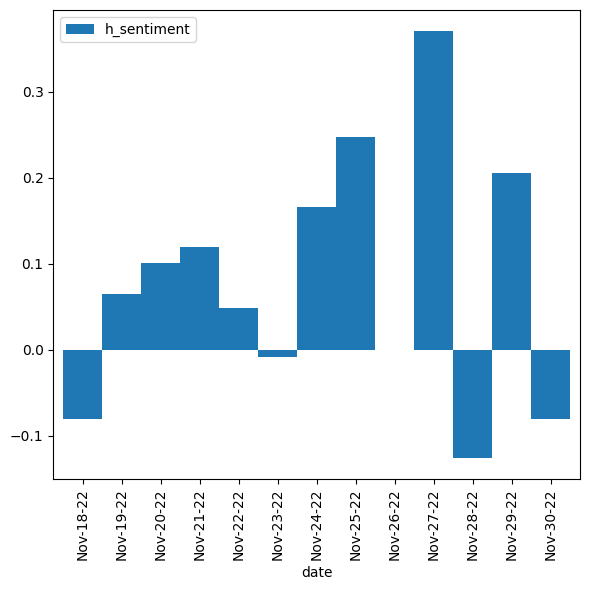

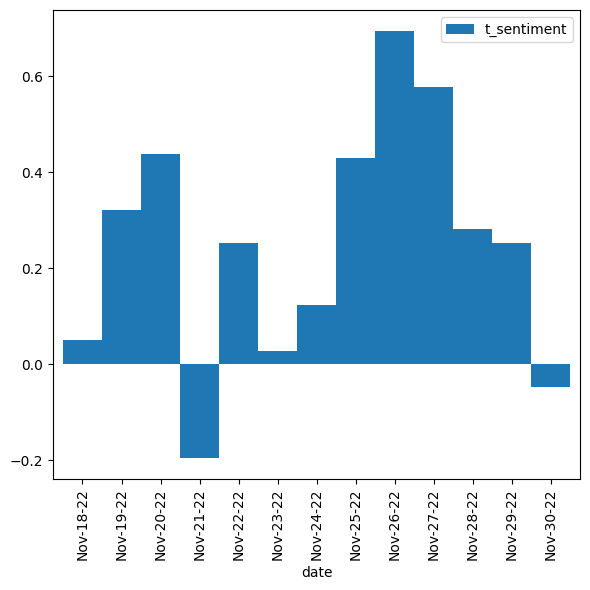

In [10]:
# Print sentiment value of META from just headline and just from twitter
plt.rcParams['figure.figsize']=[6,6]
groups_df = sentiment_df.groupby('company')
groups_df = groups_df.get_group('META')
groups_df = groups_df.groupby('date').mean()
fig = groups_df.plot(kind='bar',y='h_sentiment',stacked=False,width=1).get_figure()
plt.tight_layout()
plt.show()
fig.savefig('figure/meta_hsenti.jpg')

fig =groups_df.plot(kind='bar',y='t_sentiment',width=1).get_figure()
plt.tight_layout()
plt.show()
fig.savefig('figure/meta_fsenti.jpg')


C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3452277649.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = sentiment_df.groupby(['company','date']).mean()


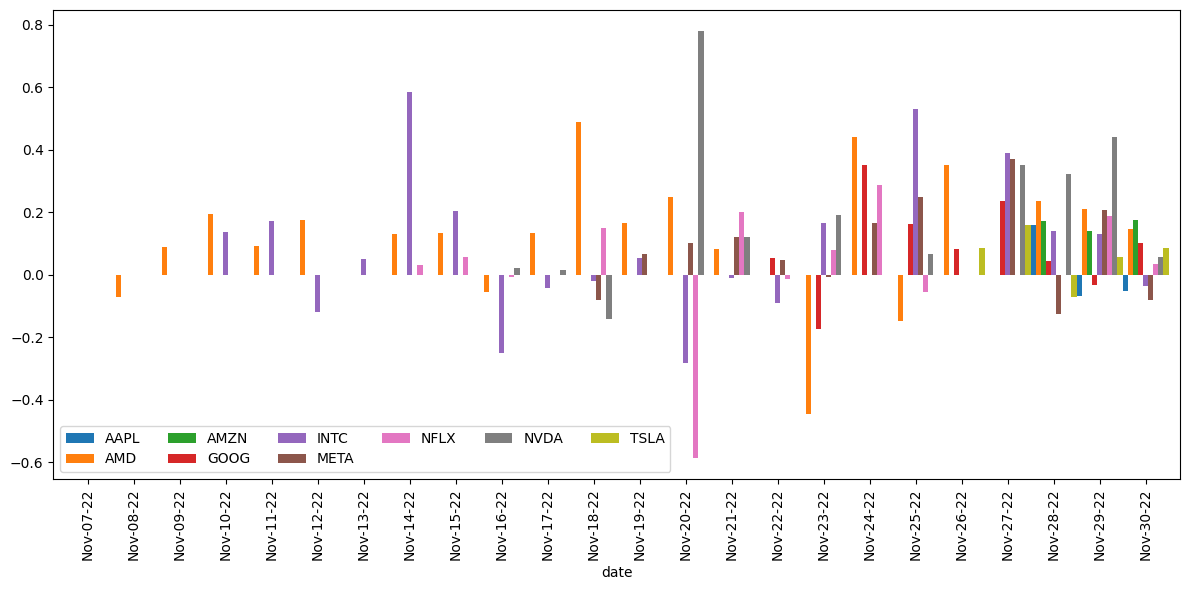

In [11]:
#plot data without tweeter feedback
plt.rcParams['figure.figsize']=[12,6]
mean_scores = sentiment_df.groupby(['company','date']).mean()
mean_scores =mean_scores.unstack().xs('h_sentiment',axis="columns").transpose()
mean_scores = mean_scores.mask(mean_scores.isna(),None)
fig =mean_scores.plot(kind='bar',stacked=False,width=1).get_figure()
plt.legend(loc='lower left',ncol=len(mean_scores.columns)/1.5)
plt.tight_layout()
plt.show()
fig.savefig('figure/all_company_hsenti.jpg')
# mean_scores

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3766147972.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = sentiment_df.groupby(['company','date']).mean()


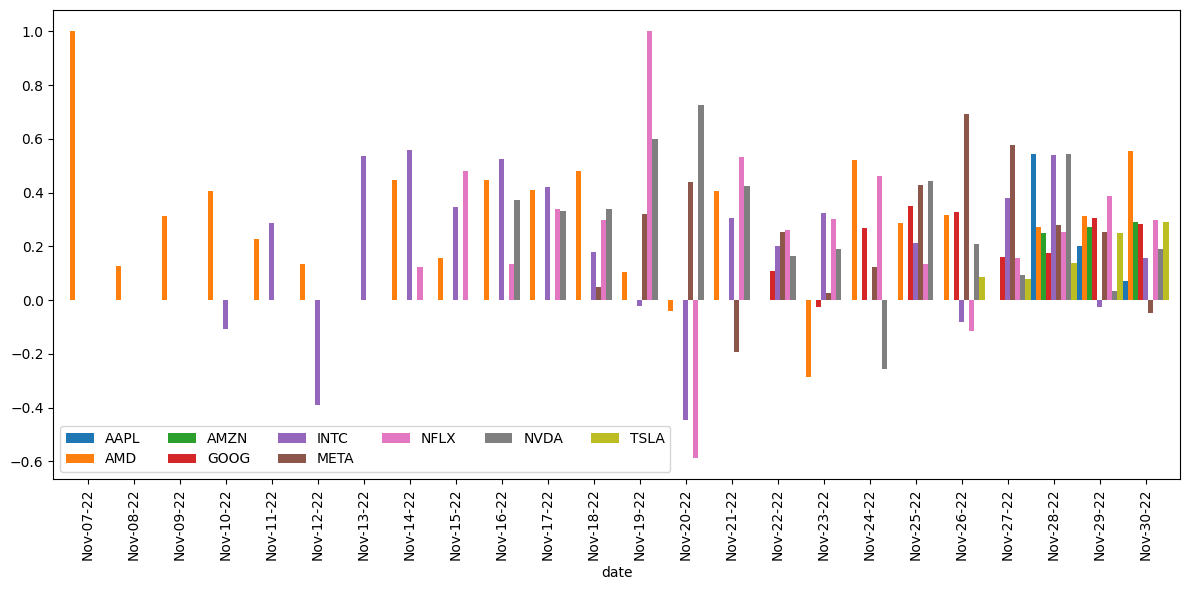

In [12]:
#plot data without tweeter feedback
plt.rcParams['figure.figsize']=[12,6]
mean_scores = sentiment_df.groupby(['company','date']).mean()
mean_scores =mean_scores.unstack().xs('t_sentiment',axis="columns").transpose()
mean_scores = mean_scores.mask(mean_scores.isna(),None)
fig =mean_scores.plot(kind='bar',stacked=False,width=1).get_figure()
plt.legend(loc='lower left',ncol=len(mean_scores.columns)/1.5)
plt.tight_layout()
plt.show()
fig.savefig('figure/all_company_tsenti.jpg')
# mean_scores

In [13]:
sentiment_df.head()

,Unnamed: 0,company,date,headline,h_sentiment,t_sentiment,0_labda,0.25_labda,0.5_labda,0.75_labda,1_labda,d
300,300,AAPL,Nov-30-22,Elon Musk and Apple's Tim Cook Make Peace,0.5423,-0.052670,0.5423,0.393558,0.244815,0.096073,-0.052670,None
301,301,AAPL,Nov-30-22,Elon Musk appears to make nice with Apple afte...,0.4215,-0.232080,0.4215,0.258105,0.094710,-0.068685,-0.232080,Nov-30-22
302,302,AAPL,Nov-30-22,"Elon Musk meets Apple CEO Tim Cook, says Twitt...",0.2057,-0.169014,0.2057,0.112021,0.018343,-0.075336,-0.169014,Nov-30-22
303,303,AAPL,Nov-30-22,Elon Musk Says Apple and Twitter Have Resolved...,0.1779,-0.083817,0.1779,0.112471,0.047041,-0.018388,-0.083817,Nov-30-22
304,304,AAPL,Nov-30-22,Elon Musk says Apple never considered removing...,0.0000,-0.223920,0.0000,-0.055980,-0.111960,-0.167940,-0.223920,Nov-30-22


C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


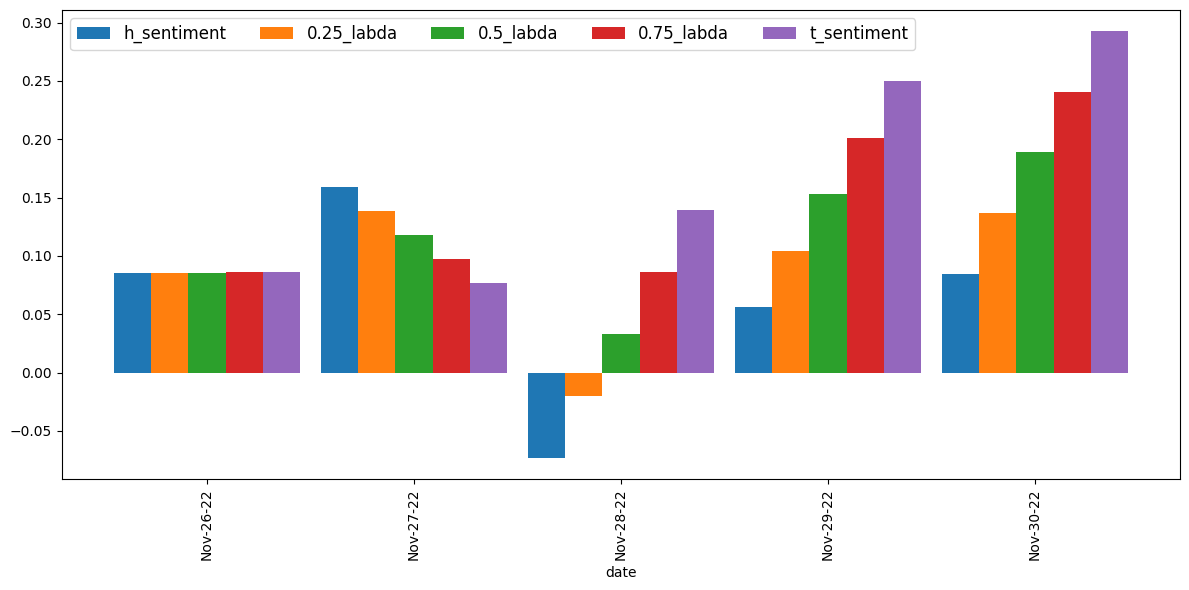

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


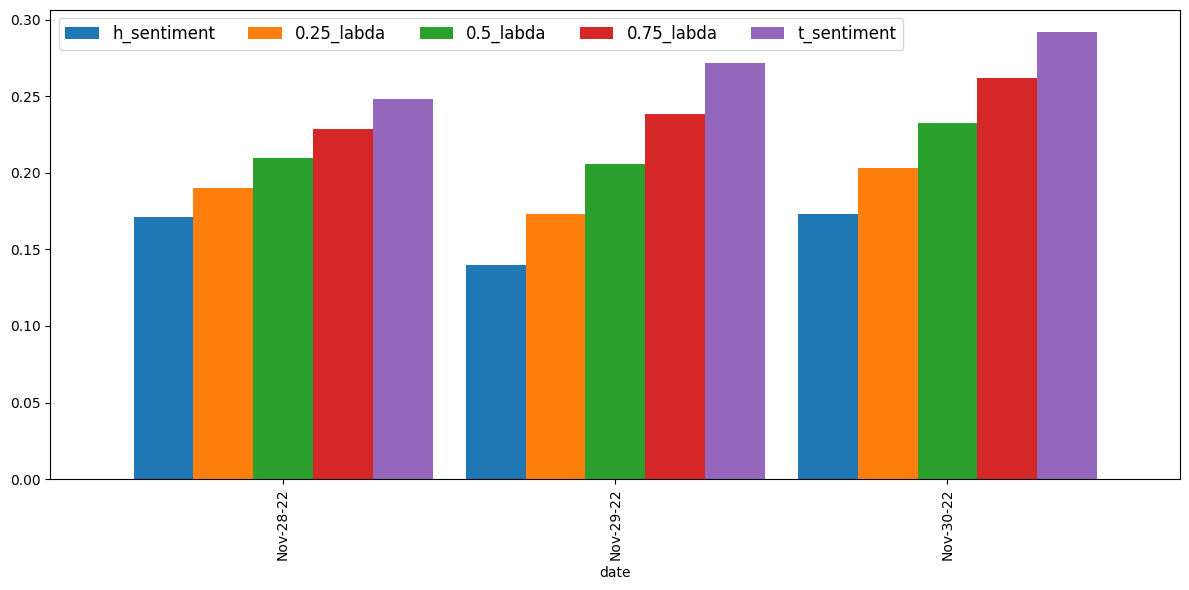

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


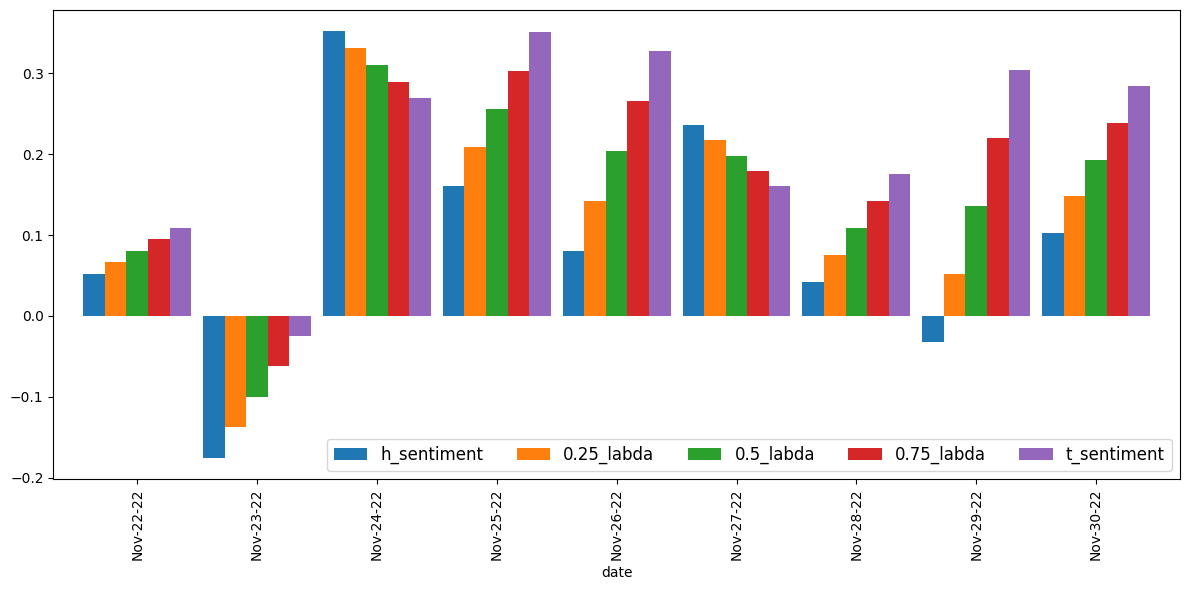

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


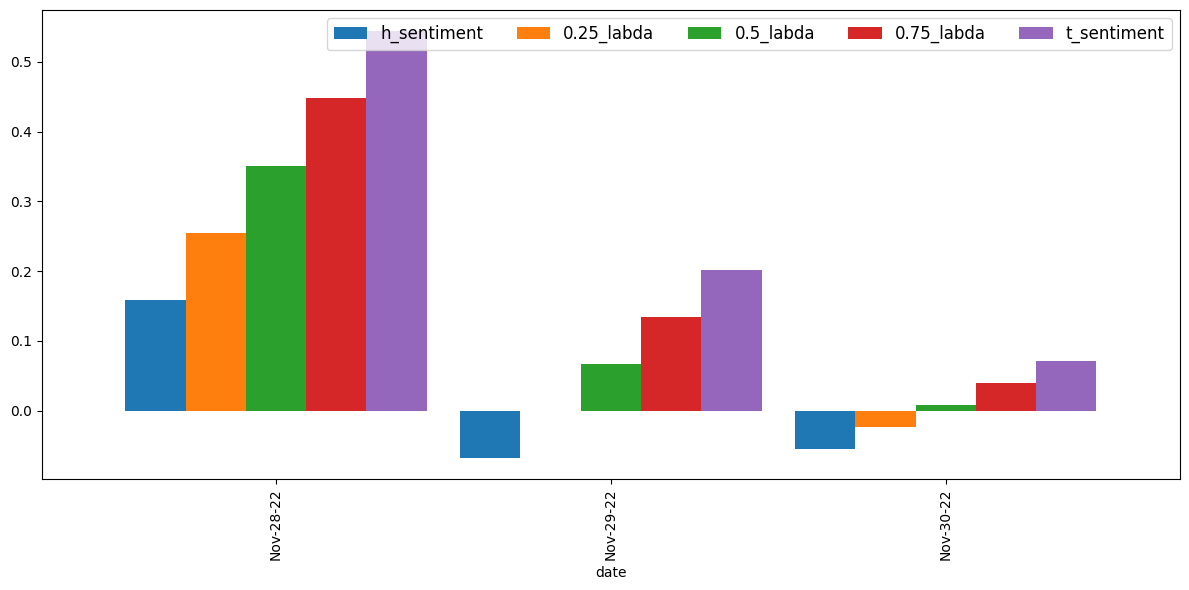

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


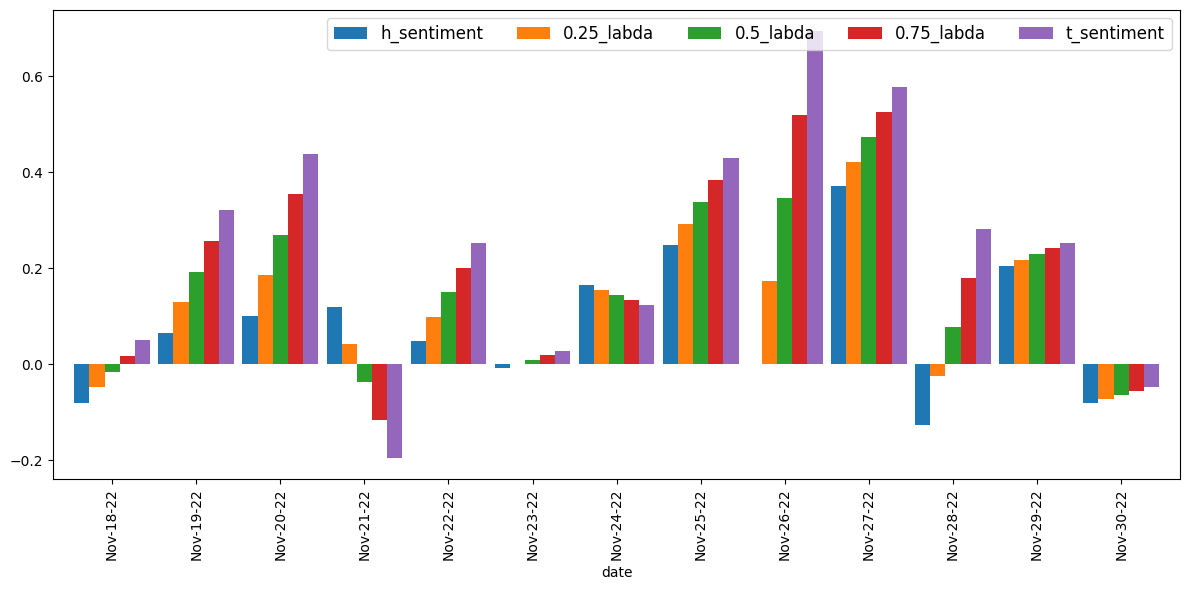

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


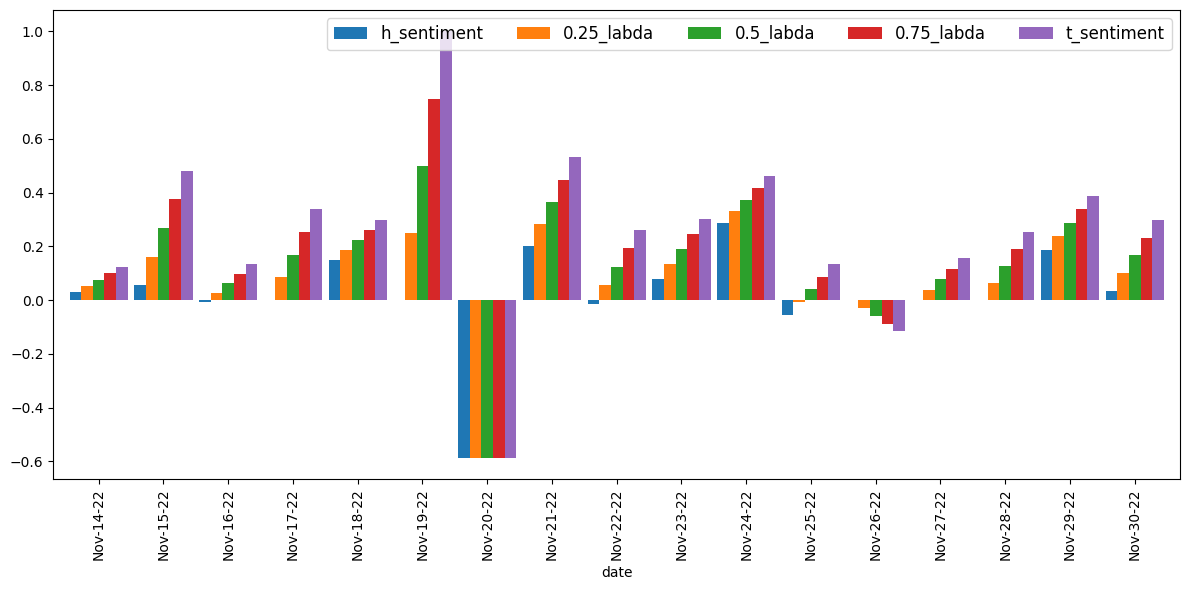

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


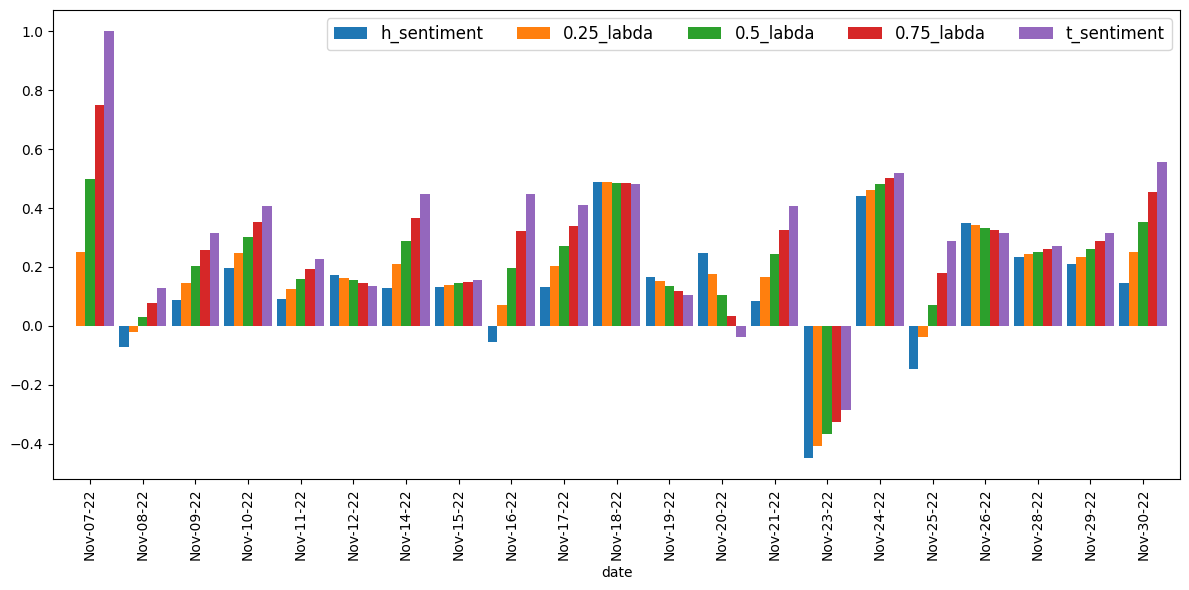

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


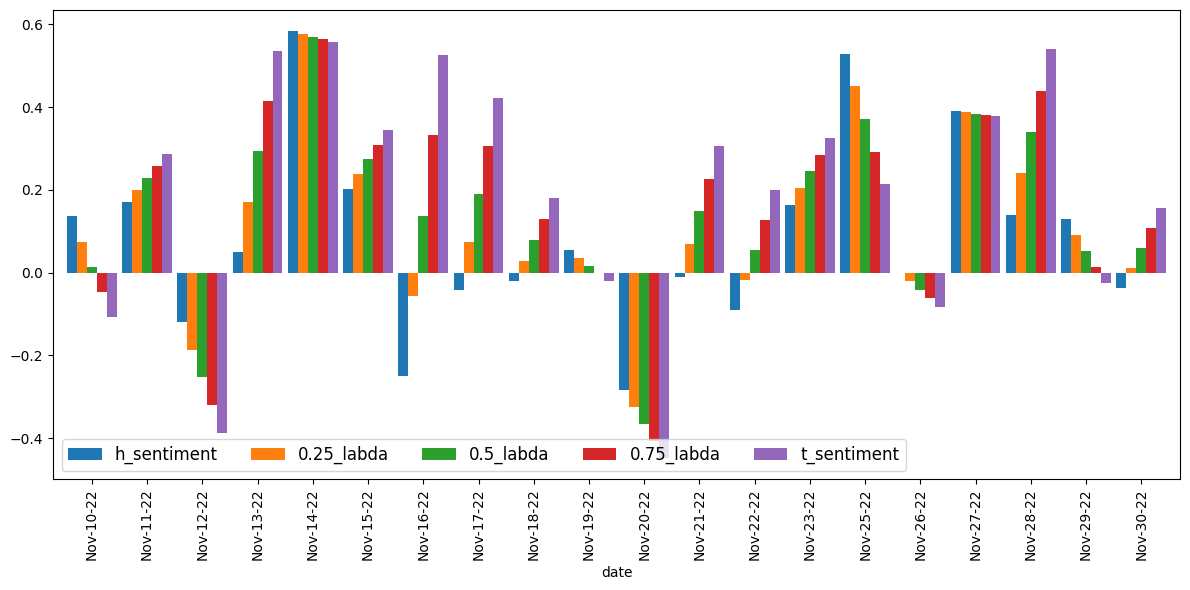

C:\Users\shaik\AppData\Local\Temp\ipykernel_6568\3923184296.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_df = groups_df.groupby('date').mean()


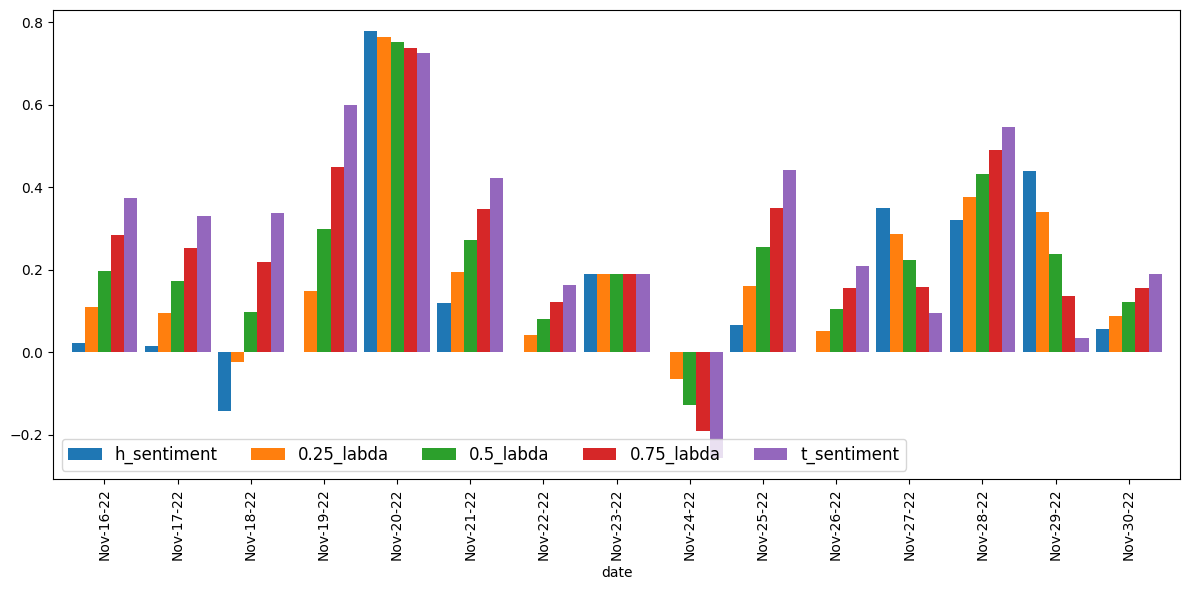

In [14]:

company_group_df = sentiment_df.groupby('company')
for company in company_name_list:
    groups_df = company_group_df.get_group(company)
    groups_df = groups_df.groupby('date').mean()
    fig = groups_df.plot(kind='bar',y=['h_sentiment','0.25_labda','0.5_labda','0.75_labda','t_sentiment'],stacked=False,width=0.9).get_figure()
    plt.tight_layout()
    plt.legend(loc='best',ncol=len(mean_scores.columns),prop={'size':12})
    plt.show()
    fig.savefig('figure/'+company+'_senti.jpg')
    